# SciFi Movie Analysis

### Importing modules

In [1]:
# importing modules
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import requests
import os
import matplotlib.pyplot as plt
import numpy as np

### Saving Datasets to user computer and loading it dynamically

In [2]:
# saving to paths
genre_data = kagglehub.dataset_download("rajugc/imdb-movies-dataset-based-on-genre")
stream_data = kagglehub.dataset_download("ruchi798/movies-on-netflix-prime-video-hulu-and-disney")
print("Path to dataset files:", genre_data)
print("Path to dataset files:", stream_data)


Path to dataset files: C:\Users\drvan\.cache\kagglehub\datasets\rajugc\imdb-movies-dataset-based-on-genre\versions\3
Path to dataset files: C:\Users\drvan\.cache\kagglehub\datasets\ruchi798\movies-on-netflix-prime-video-hulu-and-disney\versions\5


In [3]:
# Loading datasets from dynamic path
stream_file = os.path.join(stream_data, "MoviesOnStreamingPlatforms.csv")

if os.path.exists(stream_file):
    stream_df = pd.read_csv(stream_file)
    print("Stream, dataset loaded successfully!")
else:
    print(f"Error: {stream_file} not found!")

Stream, dataset loaded successfully!


In [4]:
# Genre Funtions.

def action():
    movie_file = os.path.join(genre_data, "action.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def adventure():
    movie_file = os.path.join(genre_data, "adventure.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def animation():
    movie_file = os.path.join(genre_data, "animation.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def biography():
    movie_file = os.path.join(genre_data, "biography.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def crime():
    movie_file = os.path.join(genre_data, "crime.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def family():
    movie_file = os.path.join(genre_data, "family.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def fantasy():
    movie_file = os.path.join(genre_data, "fantasy.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def film_noir():
    movie_file = os.path.join(genre_data, "film-noir.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def history():
    movie_file = os.path.join(genre_data, "history.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def horror():
    movie_file = os.path.join(genre_data, "horror.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def mystery():
    movie_file = os.path.join(genre_data, "mystery.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def romance():
    movie_file = os.path.join(genre_data, "romance.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def scifi():
    movie_file = os.path.join(genre_data, "scifi.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def sports():
    movie_file = os.path.join(genre_data, "sports.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df
def thriller():
    movie_file = os.path.join(genre_data, "thriller.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df

def war():
    movie_file = os.path.join(genre_data, "war.csv")
    if os.path.exists(movie_file):
        movie_df = pd.read_csv(movie_file)
        print("Movie dataset loaded successfully!")
    else:
        print(f"Error: {movie_file} not found!")
    return movie_df

genre_options = {
    "1": action,
    "2": adventure,
    "3": animation,
    "4": biography,
    "5": crime,
    "6": family,
    "7": fantasy,
    "8": film_noir,
    "9": history,
    "10": horror,
    "11": mystery,
    "12": romance,
    "13": scifi,
    "14": sports,
    "15": thriller,
    "16": war,
}

In [5]:
print(
    "Please Select a Genre:",
    "\n1. Action"
    "\n2. Adventure"
    "\n3. Animation"
    "\n4. Biography"
    "\n5. Crime"
    "\n6. Family"
    "\n7. Fantasy"
    "\n8. Film Noir"
    "\n9. History"
    "\n10. Horror"
    "\n11. Mystery"
    "\n12. Romance"
    "\n13. Scifi"
    "\n14. Sports"
    "\n15. Thriller"
    "\n16. War"
)
choice = input("Enter the number of your choice:")

if choice in genre_options:
    movie_df = genre_options[choice]()
else:
    print("Invalid choice.  Please try again.")

Please Select a Genre: 
1. Action
2. Adventure
3. Animation
4. Biography
5. Crime
6. Family
7. Fantasy
8. Film Noir
9. History
10. Horror
11. Mystery
12. Romance
13. Scifi
14. Sports
15. Thriller
16. War
Movie dataset loaded successfully!


In [6]:
movie_df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt3915174,Puss in Boots: The Last Wish,2022,PG,102 min,"Animation, Adventure, Comedy",7.9,When Puss in Boots discovers that his passion ...,"Joel Crawford, \nJanuel Mercado",/name/nm3150455/,"Antonio Banderas, \nSalma Hayek, \nHarvey Guil...","/name/nm2591093/,/name/nm0000104/,/name/nm0000...",75016.0,NaN
1,tt2353868,True Spirit,2023,TV-PG,109 min,"Adventure, Biography, Drama",6.8,"The story of Australian teenager, Jessica Wats...",Sarah Spillane,/name/nm1417049/,"Alyla Browne, \nTeagan Croft, \nCliff Curtis, ...","/name/nm10752061/,/name/nm7509279/,/name/nm019...",3747.0,NaN
2,tt14668630,"Lyle, Lyle, Crocodile",2022,PG,106 min,"Animation, Adventure, Comedy",6.1,Feature film based on the children's book abou...,"Josh Gordon, \nWill Speck",/name/nm0330347/,"Javier Bardem, \nWinslow Fegley, \nShawn Mende...","/name/nm0817447/,/name/nm0000849/,/name/nm9121...",8131.0,NaN
3,tt6718170,The Super Mario Bros. Movie,2023,PG,NaN,"Animation, Adventure, Comedy",NaN,The story of The Super Mario Bros. on their jo...,"Aaron Horvath, \nMichael Jelenic",/name/nm1739338/,"Chris Pratt, \nAnya Taylor-Joy, \nCharlie Day,...","/name/nm2398585/,/name/nm0695435/,/name/nm5896...",NaN,NaN
4,tt0241527,Harry Potter and the Sorcerer's Stone,2001,PG,152 min,"Adventure, Family, Fantasy",7.6,An orphaned boy enrolls in a school of wizardr...,Chris Columbus,/name/nm0001060/,"Daniel Radcliffe, \nRupert Grint, \nRichard Ha...","/name/nm0705356/,/name/nm0342488/,/name/nm0001...",792448.0,317575550.0


### Cleaning the Movie Lists to prepare merging.

In [7]:
def clean(df):
    df.columns = (
        df.columns
        .str.upper()
        .str.strip()
        .str.replace('_', ' ')
    )
    return df

def organize(df):
    df = df.drop(
        ['MOVIE ID', 'RUNTIME', 'DIRECTOR', 'DIRECTOR ID', 'STAR', 'STAR ID', 'VOTES'], axis='columns'
        )
    df = df.dropna()
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
    df['CERTIFICATE']= df['CERTIFICATE'].astype('category')
    return df

#def 

In [8]:
movie_df = clean(movie_df)
movie_df = organize(movie_df)
movie_df

,MOVIE NAME,YEAR,CERTIFICATE,GENRE,RATING,DESCRIPTION,GROSS(IN $)
4,Harry Potter and the Sorcerer's Stone,2001,PG,"Adventure, Family, Fantasy",7.6,An orphaned boy enrolls in a school of wizardr...,317575550.0
10,Puss in Boots,2011,PG,"Animation, Adventure, Comedy",6.6,"An outlaw cat, his childhood egg-friend, and a...",149260504.0
13,Encanto,2021,PG,"Animation, Comedy, Family",7.2,A Colombian teenage girl has to face the frust...,96093622.0
14,Harry Potter and the Goblet of Fire,2005,PG-13,"Adventure, Family, Fantasy",7.7,Harry Potter finds himself competing in a haza...,290013036.0
15,The Goonies,1985,PG,"Adventure, Comedy, Family",7.7,A group of young misfits called The Goonies di...,61503218.0
...,...,...,...,...,...,...,...
8396,The River Within,2009,TV-G,"Drama, Family",5.3,"Jason returns home to study for the bar exam, ...",9810.0
8463,Christmas Ride,2013,PG,"Comedy, Drama, Family",6.2,After hearing a frightening supernatural warni...,700.0
9377,Resolution Song,2018,Not Rated,"Drama, Family",4.7,A young man's family torn apart by tragedy rea...,145000.0
12792,Last Flight of the Champion,2013,PG,"Animation, Comedy, Family",5.4,Neddie Nerfhoffer has a dream. He wants to do ...,2220.0


### Cleaning Streaming Data to prepare for merge.

In [9]:
# Cleaning of stream data
stream_df.columns = (
    stream_df.columns
    .str.upper()
    .str.strip()
    .str.replace('_',' ')
)

stream_df = stream_df.drop(
    ['UNNAMED: 0', 'ID', 'YEAR', 'AGE', 'TYPE'], axis ='columns')

stream_df[['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']] = stream_df[['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']].astype(bool)
stream_df = stream_df.rename(columns={'TITLE': 'MOVIE NAME'})
stream_df = stream_df.dropna()
#stream_cleaned.info()
stream_df.columns = stream_df.columns.str.strip().str.upper()
stream_df.head()

,MOVIE NAME,ROTTEN TOMATOES,NETFLIX,HULU,PRIME VIDEO,DISNEY+
0,The Irishman,98/100,True,False,False,False
1,Dangal,97/100,True,False,False,False
2,David Attenborough: A Life on Our Planet,95/100,True,False,False,False
3,Lagaan: Once Upon a Time in India,94/100,True,False,False,False
4,Roma,94/100,True,False,False,False


In [10]:
movie_stream_df = movie_df.merge(
    stream_df[['MOVIE NAME', 'NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']],
    on='MOVIE NAME',
    how='left'
)
#print(scifi_stream_df.head())
#print(scifi_stream_df.info())
movie_stream_df = movie_stream_df.dropna()

movie_stream_df



,MOVIE NAME,YEAR,CERTIFICATE,GENRE,RATING,DESCRIPTION,GROSS(IN $),NETFLIX,HULU,PRIME VIDEO,DISNEY+
1,Puss in Boots,2011,PG,"Animation, Adventure, Comedy",6.6,"An outlaw cat, his childhood egg-friend, and a...",149260504.0,True,False,False,False
8,The Princess Bride,1987,PG,"Adventure, Family, Fantasy",8.0,"While home sick in bed, a young boy's grandfat...",30857814.0,False,False,False,True
15,The Lion King,1994,G,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,422783777.0,False,False,False,True
17,Shrek,2001,PG,"Animation, Adventure, Comedy",7.9,A mean lord exiles fairytale creatures to the ...,267665011.0,False,True,False,False
18,Cars,2006,G,"Animation, Adventure, Comedy",7.2,"On the way to the biggest race of his life, a ...",244082982.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1122,"Dancer, Texas Pop. 81",1998,PG,"Comedy, Drama, Family",6.7,Four high school friends that grew up together...,565592.0,False,False,True,False
1131,Whispers: An Elephant's Tale,2000,G,"Adventure, Family",5.0,A baby elephant named Whispers finds himself s...,500000.0,False,False,False,True
1138,Brother,2010,Not Rated,"Drama, Family, Sport",7.2,Two young men who have been raised as brothers...,29828.0,True,False,False,False
1158,Fatima,2015,Not Rated,"Drama, Family",6.5,An immigrant mother realizes that her daughter...,49086.0,True,False,False,False


### Sorted columns by rating

In [11]:
# Top Rated
movie_stream_df_top_rated = movie_stream_df.sort_values(by=['RATING'], ascending=[False])
movie_stream_df_top_rated


,MOVIE NAME,YEAR,CERTIFICATE,GENRE,RATING,DESCRIPTION,GROSS(IN $),NETFLIX,HULU,PRIME VIDEO,DISNEY+
15,The Lion King,1994,G,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,422783777.0,False,False,False,True
45,WALL·E,2008,G,"Animation, Adventure, Family",8.4,"In the distant future, a small waste-collectin...",223808164.0,False,False,False,True
37,Coco,2017,PG,"Animation, Adventure, Comedy",8.4,"Aspiring musician Miguel, confronted with his ...",209726015.0,False,False,False,True
47,Up,2009,PG,"Animation, Adventure, Comedy",8.3,78-year-old Carl Fredricksen travels to Paradi...,293004164.0,False,False,False,True
78,Toy Story 3,2010,G,"Animation, Adventure, Comedy",8.3,The toys are mistakenly delivered to a day-car...,415004880.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
788,Mr. Magoo,1997,PG,"Adventure, Comedy, Family",4.0,The myopic millionaire defeats jewel smugglers...,21382456.0,False,False,False,True
615,Beverly Hills Chihuahua,2008,PG,"Adventure, Comedy, Drama",3.9,"While on vacation in Mexico, Chloe, a ritzy Be...",94514402.0,False,False,False,True
567,Kazaam,1996,PG,"Comedy, Family, Fantasy",3.1,"A troubled kid inadvertently releases a genie,...",18876581.0,False,False,False,True
480,Bratz,2007,PG,"Comedy, Family, Music",3.0,"During their first year of high school, four b...",10005534.0,False,True,False,False


In [12]:
def stream_count(df, column_name):
    count = df[df[column_name] == True].shape[0]
    print(f'Total available on {column_name}: {count}')
    return count

def stream_totals(df):
    stream_services = ['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']

    stream_counts = {}
    for service in stream_services:
        count = stream_count(df, service)
        stream_counts[service] = count
    #return stream_counts


In [13]:
stream_totals(movie_stream_df_top_rated)

Total available on NETFLIX: 77
Total available on HULU: 39
Total available on PRIME VIDEO: 72
Total available on DISNEY+: 258


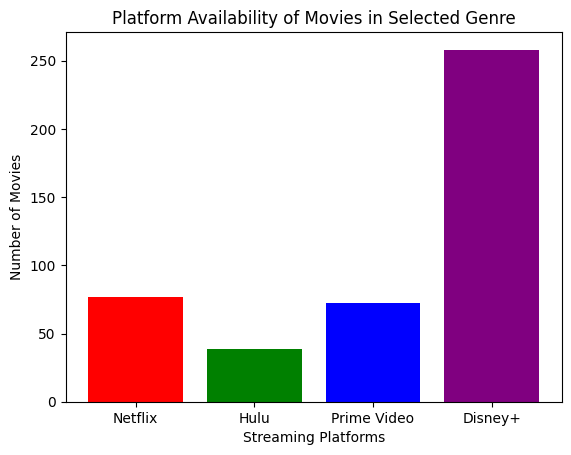

In [23]:
platform_counts = {
    "Netflix": movie_stream_df_top_rated["NETFLIX"].sum(),
    "Hulu": movie_stream_df_top_rated["HULU"].sum(),
    "Prime Video": movie_stream_df_top_rated["PRIME VIDEO"].sum(),
    "Disney+": movie_stream_df_top_rated["DISNEY+"].sum(),
}

platforms = list(platform_counts.keys())
values = list(platform_counts.values())

plt.bar(platforms, values, color=["red", "green", "blue", "purple"])
plt.xlabel("Streaming Platforms")
plt.ylabel("Number of Movies")
plt.title(f"Platform Availability of Movies in Selected Genre")
plt.show()

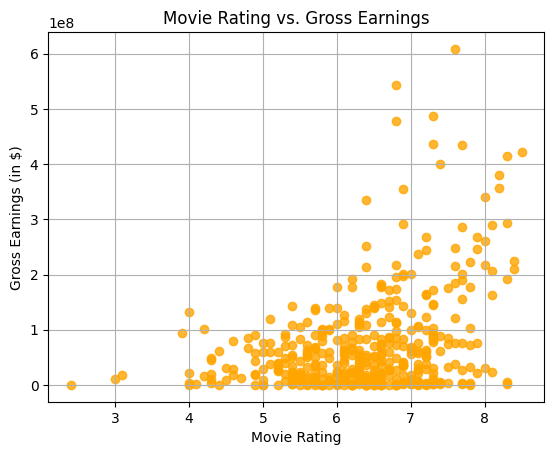

In [16]:
# Scatter plot
plt.scatter(movie_stream_df_top_rated["RATING"], movie_stream_df_top_rated["GROSS(IN $)"], color="orange", alpha=0.8)

# Add labels and title
plt.xlabel("Movie Rating")
plt.ylabel("Gross Earnings (in $)")
plt.title("Movie Rating vs. Gross Earnings")
plt.grid(True)
plt.show()